In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For scrapping data from Yahoo Finance website
import pandas_datareader as data 

In [10]:
start = '2010-01-01'
end = '2019-12-31'

#data frame
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325798
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298729
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721901
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245934


In [12]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [13]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


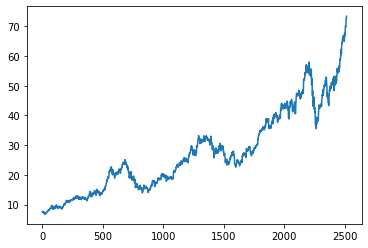

In [14]:
plt.plot(df.Close) 
# Simple graph showing the closing prices of Apple

In [15]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [16]:
#Rolling Function to calculate moving Average 100 as ma100
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

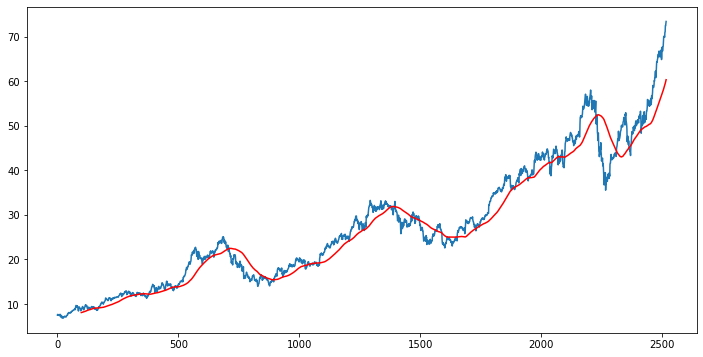

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
#Rolling Function to calculate moving Average 200 as ma200
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

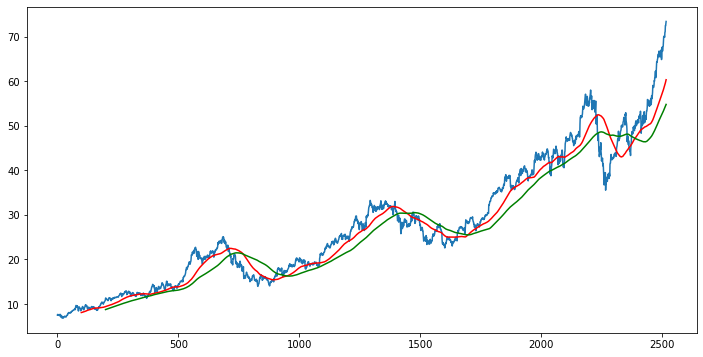

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')#visuals of moving average 100
plt.plot(ma200,'g')#visuals of moving average 200

In [20]:
df.shape
# Here there are 5 columns but we need to work 
# on only closing price so only one column

(2517, 5)

In [21]:
#Splitting Data into Training and Testing:

#70% of data for training and 
#30% of data for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [22]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [23]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [26]:
data_training_array.shape

(1761, 1)

In [27]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
      input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu',))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam',  loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 20s 288ms/step - loss: 0.0593
Epoch 2/50
52/52 [==============================] - 17s 324ms/step - loss: 0.0128
Epoch 3/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0102
Epoch 4/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 17s 327ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 16s 306ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 19s 355ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 19s 364ms/step - loss: 0.0082
Epoch 13/50
5

In [40]:
model.save('keras_model.h5')

In [41]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [42]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [45]:
past_100_days = data_training.tail(100)

In [46]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [48]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [52]:
input_data = scaler.transform(final_df)
input_data

array([[0.76668248],
       [0.7708505 ],
       [0.76317748],
       [0.76251438],
       [0.7648826 ],
       [0.7771974 ],
       [0.77625005],
       [0.77473443],
       [0.77340823],
       [0.77606063],
       [0.76800868],
       [0.77122943],
       [0.76346165],
       [0.75910413],
       [0.75313622],
       [0.75199945],
       [0.74423167],
       [0.74517895],
       [0.75114692],
       [0.76061982],
       [0.76033558],
       [0.76658773],
       [0.73968465],
       [0.71704442],
       [0.73892687],
       [0.7627038 ],
       [0.79889028],
       [0.83488733],
       [0.82872993],
       [0.81603628],
       [0.81594153],
       [0.81575211],
       [0.82588811],
       [0.80779483],
       [0.80940521],
       [0.81139451],
       [0.81954121],
       [0.80277421],
       [0.81101566],
       [0.80599496],
       [0.81054198],
       [0.81101566],
       [0.81897286],
       [0.82058323],
       [0.83943436],
       [0.84180258],
       [0.85165434],
       [0.848

In [53]:
input_data.shape

(856, 1)

In [55]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [57]:
# making predictions 
y_predicted = model.predict(x_test)

In [58]:
y_predicted.shape

(756, 1)

In [59]:
y_test

array([0.84587593, 0.83725556, 0.84038163, 0.83915011, 0.84473916,
       0.85705396, 0.86728464, 0.86842141, 0.87448406, 0.86974761,
       0.86775831, 0.87685229, 0.87675754, 0.87476824, 0.87685229,
       0.87761014, 0.87656811, 0.89466132, 0.89522974, 0.89532442,
       0.89229309, 0.88964069, 0.95974017, 0.95765612, 0.96286625,
       0.97432837, 0.98607482, 0.99090595, 0.9945057 , 0.9916638 ,
       1.00274708, 1.0191353 , 1.02377693, 1.02226138, 1.0257663 ,
       1.0350497 , 1.03893363, 1.03343933, 1.03467085, 1.03722843,
       1.03779693, 1.06432093, 1.05645855, 1.06422626, 1.06005816,
       1.06176335, 1.05683741, 1.05380601, 1.05816361, 1.05873196,
       1.05674273, 1.0706679 , 1.07284663, 1.06621563, 1.08014081,
       1.06479461, 1.07976181, 1.07502536, 1.07237296, 1.07464651,
       1.10230736, 1.10533861, 1.10353874, 1.10098116, 1.10136001,
       1.11149608, 1.10439141, 1.10098116, 1.09794976, 1.09633939,
       1.08175118, 1.08336156, 1.07625688, 1.08364573, 1.07767

In [60]:
y_predicted

array([[0.75473666],
       [0.7552221 ],
       [0.7547271 ],
       [0.7534126 ],
       [0.7514986 ],
       [0.7493354 ],
       [0.7475023 ],
       [0.746636  ],
       [0.7470764 ],
       [0.74893737],
       [0.75191987],
       [0.75550413],
       [0.75935733],
       [0.7631742 ],
       [0.7666404 ],
       [0.7695595 ],
       [0.77183914],
       [0.7734449 ],
       [0.7747717 ],
       [0.7761483 ],
       [0.7777206 ],
       [0.7794008 ],
       [0.78097296],
       [0.78370106],
       [0.7883011 ],
       [0.794911  ],
       [0.80330014],
       [0.8130237 ],
       [0.82343507],
       [0.8337945 ],
       [0.8433403 ],
       [0.8516898 ],
       [0.8589188 ],
       [0.86518216],
       [0.87051225],
       [0.8749449 ],
       [0.87865293],
       [0.8818079 ],
       [0.8843843 ],
       [0.88635504],
       [0.8877603 ],
       [0.8886682 ],
       [0.88964486],
       [0.89090395],
       [0.89260423],
       [0.89463854],
       [0.8968389 ],
       [0.898

In [64]:
scaler.scale_

array([0.0378916])

In [74]:
scale_factor = 1/0.378916
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

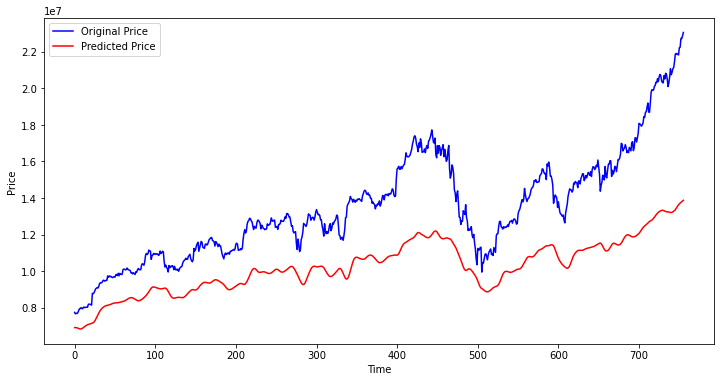

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()